In [ ]:
# Denoise example




In [10]:
import torch as th
import einops


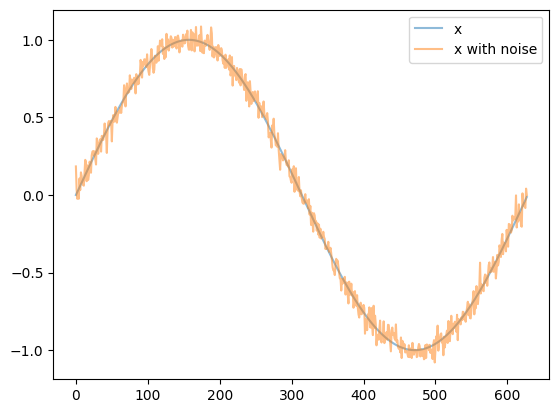

In [12]:
import matplotlib.pyplot as plt
import numpy as np
x = th.sin(th.arange(0,3.14*2,0.01))[np.newaxis, np.newaxis]
n = th.normal(0,0.05, size=x.shape)
plt.plot(x.flatten(), label='x', alpha=0.5)
plt.plot((x+n).flatten(), label='x with noise', alpha=0.5)
plt.legend()




In [45]:
from turtle import forward
from torch.optim import SGD
import torch.nn as nn

class Denoiser(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.act = th.nn.ReLU(inplace=True)
        self.out_act = th.nn.Tanh()
        self.convin = th.nn.Conv1d(1,32, kernel_size=3, padding=1)
        self.conv1 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.conv2 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.conv3 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.conv4 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.conv5 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.conv6 = th.nn.Conv1d(32,32, kernel_size=3, padding=1)
        self.convout = th.nn.Conv1d(32,1, kernel_size=3, padding=1)
        
    def forward(self, x):
        x0 = self.act(self.convin(x))
        x1 = self.act(self.conv1(x0)) + x0
        o1 = self.out_act(self.convout(x7))
        x2 = self.act(self.conv2(x1)) + x1
        x3 = self.act(self.conv3(x2)) + x2
        x4 = self.act(self.conv3(x3)) + x3
        x5 = self.act(self.conv4(x4)) + x4
        x6 = self.act(self.conv5(x5)) + x5
        x7 = self.act(self.conv6(x6)) + x6
        x7 = self.act(self.conv6(x6)) + x6
        x7 = self.act(self.conv6(x7)) + x7
        x7 = self.act(self.conv6(x7)) + x7
        xout = self.out_act(self.convout(x7))
        return xout

denoiser = Denoiser()
optim = SGD(denoiser.parameters(),0.001)
loss = nn.MSELoss()

nsteps = 2000
for i in range(nsteps):
    #n = th.normal(0,0.05, size=x.shape)
    xin = x+n
    xout = denoiser(xin)
    loss_val = loss(xout, x)
    loss_val.backward()
    optim.step()
    optim.zero_grad()
    



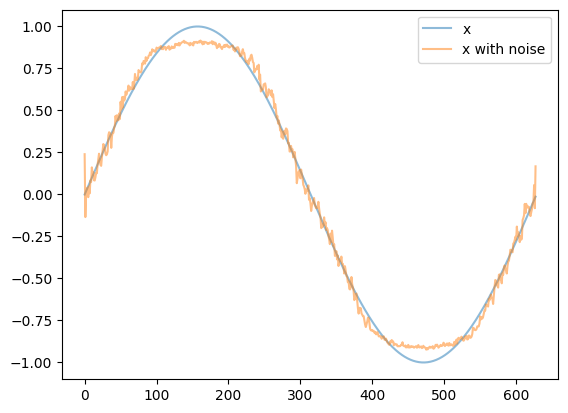

In [46]:
import matplotlib.pyplot as plt
import numpy as np
x = th.sin(th.arange(0,3.14*2,0.01))[np.newaxis, np.newaxis]
n = th.normal(0,0.05, size=x.shape)
plt.plot(x.flatten(), label='x', alpha=0.5)
#plt.plot((x+n).flatten(), label='x with noise', alpha=0.5)
plt.plot((xout.detach()).flatten(), label='x with noise', alpha=0.5)

plt.legend()
